In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# INTRODUCTION
* **Logistic Regression:**
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value).

(Wikipedia)

In [ ]:
data_gender=pd.read_csv('../input/voicegender/voice.csv')
data_gender.info()

In [ ]:
data_gender.head()

**Let's change the label features of the data set to 0 for male and 1 for female.**

In [ ]:
data_gender['label']=[1 if each == "female" else 0 for each in data_gender["label"]]

# First, Let's Apply Logistic Regression with Our Own Algorithm

**Dependent Values and Independt Values:**

In [ ]:
#Dependent Values:
y=data_gender.label.values
#Independent Values:
x_data=data_gender.drop(["label"],axis=1)
# x_data Normalization ---->>> (x-min(x))/(max(x)-min(x))
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T

"""print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)"""

**Initialize**

In [ ]:
def initalize_weight_and_bias(dimension):
    w=np.full((dimension,1),0.01) 
    b=0.0
    return w,b

**Sigmoid Function**



A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. A common example of a sigmoid function is the logistic function shown in the first figure and defined by the formula:
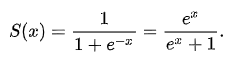


**Graph of the Sigmoid Function:**
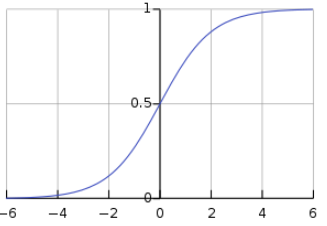

In [ ]:
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

**Forward and Back Propagation**


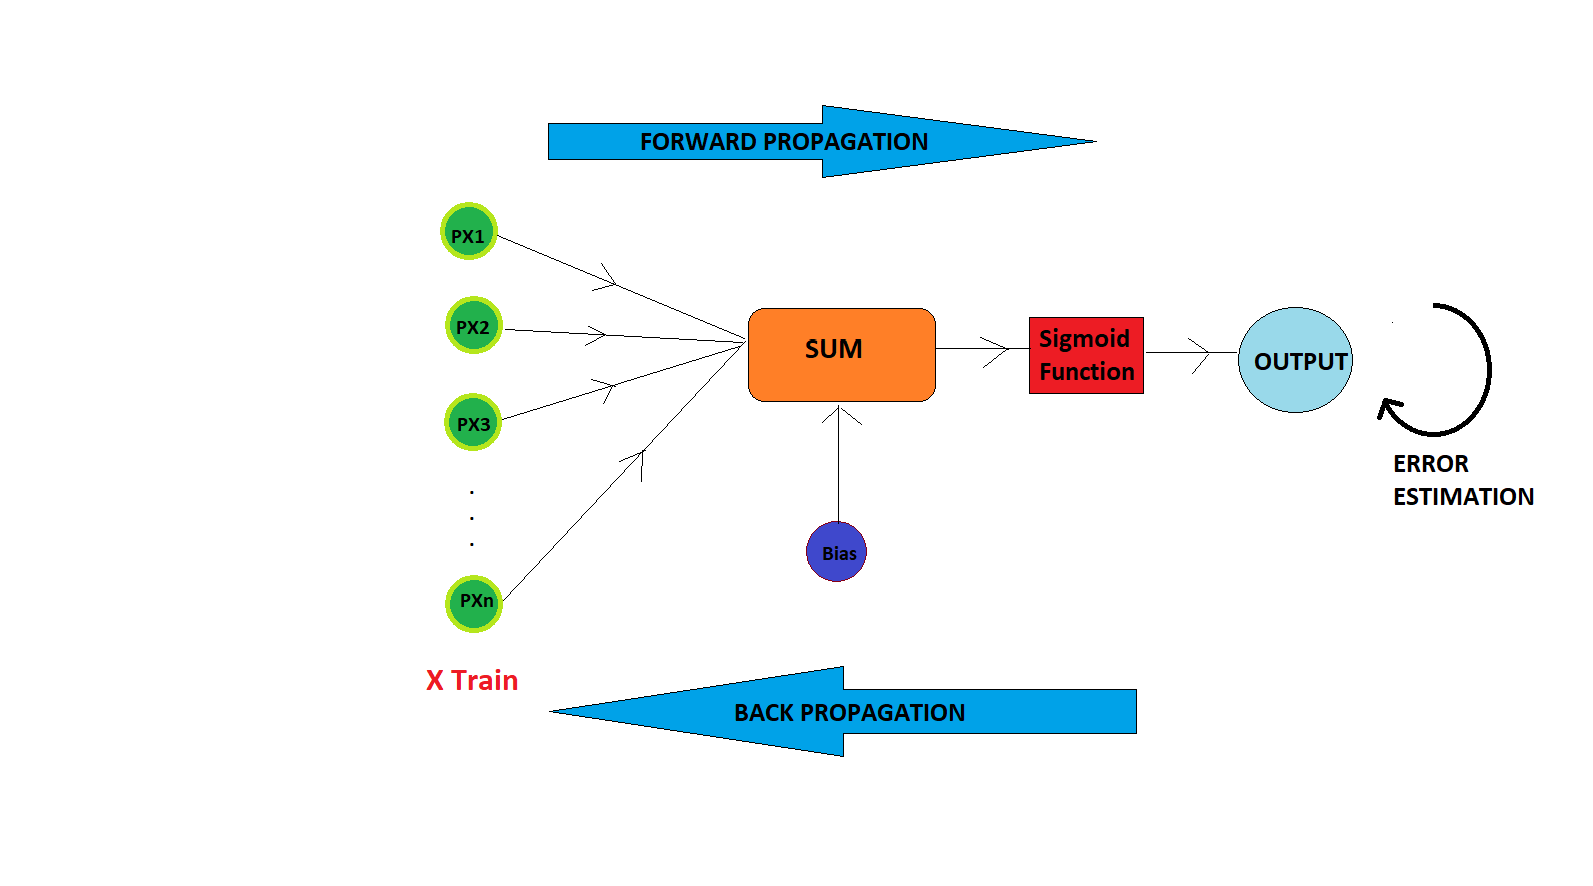

In [ ]:
def forward_back_propagation(w,b,x_train,y_train):
    #forward propagation
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    
    #backward propagation
    derivative_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]
    gradients={"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    
    return cost,gradients

**Updating (learning) Parameters**

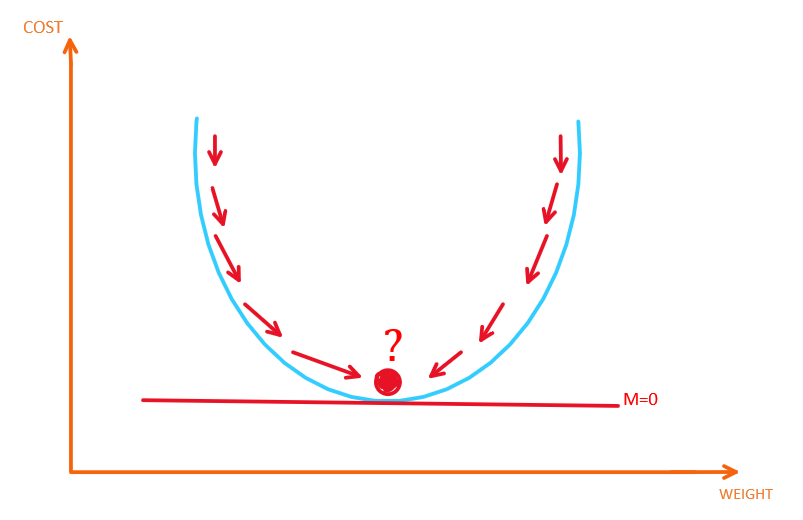

In [ ]:
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list=[]
    cost_list2=[]
    index=[]

    for i in range(number_of_iteration):
        cost,gradients=forward_back_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        
        w=w-learning_rate*gradients["derivative_weight"]
        b=b-learning_rate*gradients["derivative_bias"]
        
        if i % 10 == 0: #her 10 adımda costu görmek istiyoruz
            cost_list2.append(cost)
            index.append(i)
            #print("Cost after iteration %i : %f" %(i,cost))
            
    parameters={"weight": w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation="vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters,gradients,cost_list

**PREDICT FUNCTION**

In [ ]:
def predict(w,b,x_test):
    z=sigmoid(np.dot(w.T,x_test)+b)
    y_prediction=np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            y_prediction[0,i]=0
        else: 
            y_prediction[0,i]=1
        
    return y_prediction

**LOGISTIC REGRESSION FUNCTION**

In [ ]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    dimension=x_train.shape[0]
    w,b=initalize_weight_and_bias(dimension)
    parameters,gradients,cost_list=update(w, b, x_train, y_train, learning_rate, num_iterations)
    y_prediction_test=predict(parameters["weight"],parameters["bias"],x_test)
    print("Test Accuracy: {0} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))

In [ ]:
#Let's Try the "logistic_regression" Function we created
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=2,num_iterations=1000)

# Let's Apply Logistic Regression Using Sklearn Library

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy: {} %".format(lr.score(x_test.T,y_test.T)*100))